In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [2]:
#load data sets as train and test
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
#detecting and removing outliers
def detect_and_remove_outliers(df):
    """this function takes in a dataframe df, checks columns specified below and 
    removes the row from the df if the number of outliers is more than 2"""
    outliers = []
    col = ["Age", "Parch", "SibSp", "Fare"]
    #checking interquartile range IQR for all columns
    for c in col:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        outliers.extend(df[(df[c] < Q1 - (1.5 * IQR)) | (df[c] > Q3 + (1.5 * IQR) )].index)
    #returning keys for count of occurrences in the list outlier key value pairs
    return  list(k for k,v in Counter(outliers).items() if v >2)
outliers = detect_and_remove_outliers(train)
outliers

[745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [4]:
#removing these outliers
#train = train.drop(outliers, axis=0).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#concatenating the train and test data sets to ensure the features are comparable
Concatenated = pd.concat([train, test], axis=0, sort=True)
Concatenated.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


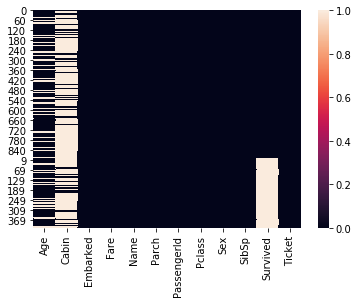

In [6]:
#creating heatmap to visualize null values in different columns
sns.heatmap(Concatenated.isnull())
#the survived column may be ignored in this case since the values will be null for the test dataset.

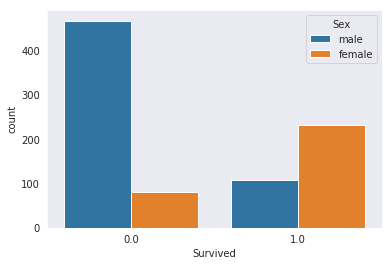

In [7]:
#checking number of survivors by sex
sns.set_style('dark')
sns.countplot(data=Concatenated, x='Survived', hue='Sex')
#This plot indicates that if a person did not survive, they were more likely to be male.

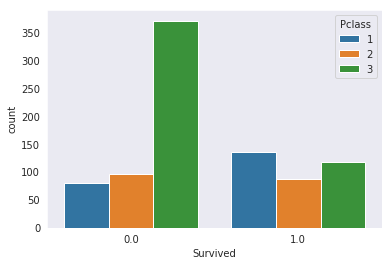

In [8]:
#checking number of survivors by class
sns.countplot(data=Concatenated, x='Survived', hue='Pclass')
#This plot indicates that if a person did not survive, they were more likely to be in the 3rd class which had the cheapest tickets 
#available.

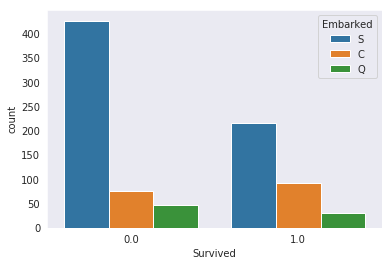

In [9]:
#checking if the port of embarkation had anything to do with a person surviving
sns.countplot(data=Concatenated, x='Survived', hue='Embarked')
#This indicates that most people boarded at port S. This may or may not have anything to do with their survival.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


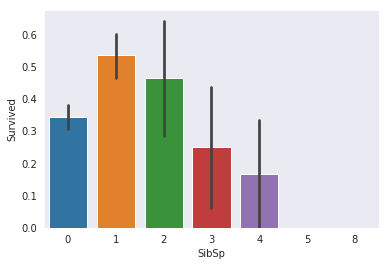

In [10]:
#checking to see if SibSp has a relationship with survival
sns.barplot(data=Concatenated, x='SibSp', y='Survived')
#this indicates that bigger families were less likely to survive

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


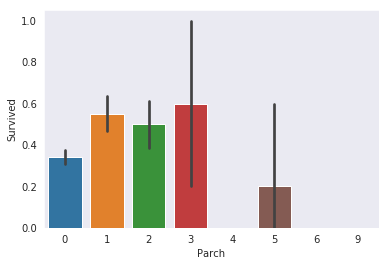

In [11]:
#checking to see if Parch has a relationship with survival
sns.barplot(data=Concatenated, x='Parch', y='Survived')
#this indicates that bigger families were less likely to survive

,Pclass,Age
0,1,39.159930
1,2,29.506705
2,3,24.816367


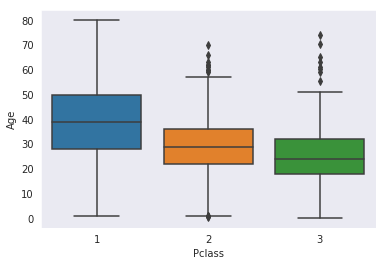

In [12]:
#creating a boxplot to determine average values of age by class
sns.boxplot(y='Age', x='Pclass', data=Concatenated)
Concatenated.groupby('Pclass', as_index=False)['Age'].mean()

In [13]:
#creating a function to replace null values in Age by Pclass
def rm_null_age(colnames):
    age = colnames[0]
    pclass = colnames[1]
    if pd.isnull(age):
        if pclass == 1:
            return 39
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

Concatenated['Age'] = Concatenated[['Age', 'Pclass']].apply(rm_null_age, axis=1)

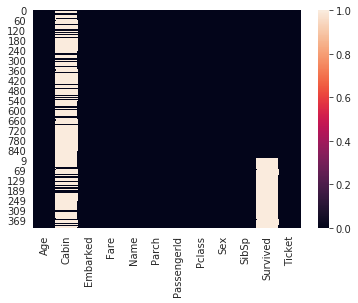

In [14]:
#creating heatmap to see where null values remain now
sns.heatmap(Concatenated.isnull())

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


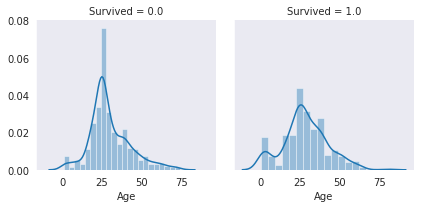

In [15]:
#checking the relationship between age and survived
g = sns.FacetGrid(Concatenated, col='Survived')
g.map(sns.distplot, 'Age')

In [16]:
#checking Fare paid by Pclass
Concatenated.groupby('Pclass', as_index=False)['Fare'].mean()

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [17]:
#creating a function to handle null values in Fare
def rm_null_fare(colnames):
    fare = colnames[0]
    pclass = colnames[1]
    if pd.isnull(fare):
        if pclass == 1:
            return 86
        elif pclass == 2:
            return 21
        else:
            return 13
    else:
        return fare

Concatenated['Fare'] = Concatenated[['Fare', 'Pclass']].apply(rm_null_fare, axis=1)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


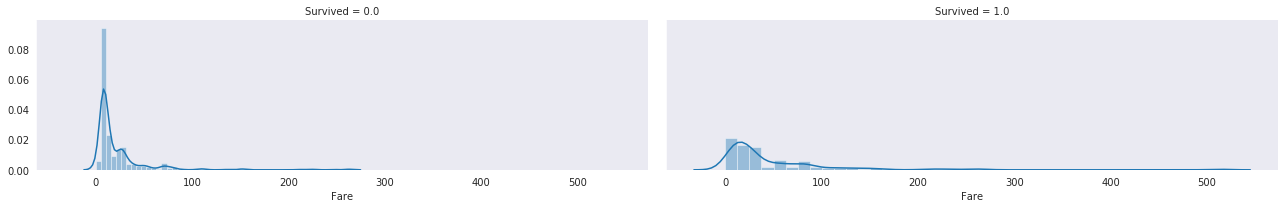

In [18]:
#checking relationship with Fare
#sns.distplot(Concatenated['Fare'])
g = sns.FacetGrid(Concatenated, col='Survived', height=3, aspect=3)
g.map(sns.distplot, 'Fare')
#this indicates that those who paid a higher fare had a higher chance of survival.

In [19]:
#analyzing titles in name and adding them as a separate column in the dataframe
title = [item.split(', ')[1].split('.')[0] for item in Concatenated['Name']]
Concatenated['Title'] = pd.Series(title)
Concatenated.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [20]:
#checking count for titles
Counter(Concatenated['Title'])

Counter({'Mr': 745,
         'Mrs': 183,
         'Miss': 283,
         'Master': 63,
         'Don': 2,
         'Rev': 9,
         'Dr': 10,
         'Mme': 2,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'the Countess': 1,
         'Jonkheer': 1})

In [21]:
#marking titles with count less than 10 as rare
Concatenated['Title'] = Concatenated['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir',
                                                       'Mlle', 'Col', 'the Countess', 'Jonkheer'], 'Rare')

In [22]:
#handling categorical variables
sex = pd.get_dummies(Concatenated['Sex'], drop_first=True)
embarked = pd.get_dummies(Concatenated['Embarked'], drop_first=True)
pclass = pd.get_dummies(Concatenated['Pclass'], drop_first=True)
title = pd.get_dummies(Concatenated['Title'], drop_first=True)
Concatenated = pd.concat([Concatenated, sex, embarked, pclass, title], axis=1)
Concatenated.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,male,Q,S,2,3,Master,Miss,Mr,Mrs,Rare
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,0,1,0,1,0,0,1,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,0,0,0,0,0,0,0,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,0,1,0,1,0,1,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,0,0,1,0,0,0,0,0,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,0,1,0,1,0,0,1,0,0


In [23]:
#removing all other columns that we do not need
Concatenated.drop(['Sex', 'Embarked', 'Pclass', 'Cabin', 'Ticket', 'Name', 'Title'], axis=1, inplace=True)
Concatenated.head()

,Age,Fare,Parch,PassengerId,SibSp,Survived,male,Q,S,2,3,Master,Miss,Mr,Mrs,Rare
0,22.0,7.2500,0,1,1,0.0,1,0,1,0,1,0,0,1,0,0
1,38.0,71.2833,0,2,1,1.0,0,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,3,0,1.0,0,0,1,0,1,0,1,0,0,0
3,35.0,53.1000,0,4,1,1.0,0,0,1,0,0,0,0,0,1,0
4,35.0,8.0500,0,5,0,0.0,1,0,1,0,1,0,0,1,0,0


In [24]:
#Splitting the test and train dataframes again
Test = Concatenated[Concatenated['Survived'].isnull()]
Train = Concatenated[-Concatenated['Survived'].isnull()]
Test.drop(['Survived'], axis=1, inplace=True)
Test.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Age,Fare,Parch,PassengerId,SibSp,male,Q,S,2,3,Master,Miss,Mr,Mrs,Rare
0,34.5,7.8292,0,892,0,1,1,0,0,1,0,0,1,0,0
1,47.0,7.0000,0,893,1,0,0,1,0,1,0,0,0,1,0
2,62.0,9.6875,0,894,0,1,1,0,1,0,0,1,0,0,0
3,27.0,8.6625,0,895,0,1,0,1,0,1,0,0,0,1,0
4,22.0,12.2875,1,896,1,0,0,1,0,1,0,0,1,0,0


In [25]:
Train['Survived'] = Train['Survived'].astype(int)
Train.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Age,Fare,Parch,PassengerId,SibSp,Survived,male,Q,S,2,3,Master,Miss,Mr,Mrs,Rare
0,22.0,7.2500,0,1,1,0,1,0,1,0,1,0,0,1,0,0
1,38.0,71.2833,0,2,1,1,0,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,3,0,1,0,0,1,0,1,0,1,0,0,0
3,35.0,53.1000,0,4,1,1,0,0,1,0,0,0,0,0,1,0
4,35.0,8.0500,0,5,0,0,1,0,1,0,1,0,0,1,0,0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


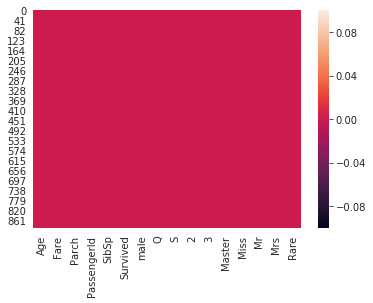

In [26]:
#dropping any remaining null rows
Train.dropna(axis=1, inplace=True)
sns.heatmap(Train.isnull())

In [27]:
#Splitting data set for cross validation
from sklearn.model_selection import train_test_split
X = Train.drop(['Survived'], axis=1)
y = Train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
#Using Logistic Regression for prediction
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)
predictionLR = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictionLR))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.84      0.70      0.77       114

   micro avg       0.82      0.82      0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictionLR)

0.8021758942811574

In [30]:
#Using Random Forest for prediction
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
prediction_RFC = rfc.predict(X_test)
print(classification_report(y_test, prediction_RFC))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       154
           1       0.86      0.67      0.75       114

   micro avg       0.81      0.81      0.81       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



In [31]:
roc_auc_score(y_test, prediction_RFC)

0.7943722943722943

In [32]:
#Using Random forests since it gives a better prediction
predicted_RF = rfc.predict(Test)
predicted_RF = pd.DataFrame(predicted_RF)
predicted_RF.columns=['Survived']
Test_RFC = pd.concat([predicted_RF, Test], axis=1)
Test_RFC = Test_RFC[['PassengerId','Survived']]
Test_RFC['Survived'] = Test_RFC['Survived'].astype(int)
#Test_RFC.to_csv('Prediction_RFC2', index=False)

In [33]:
Test_RFC.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


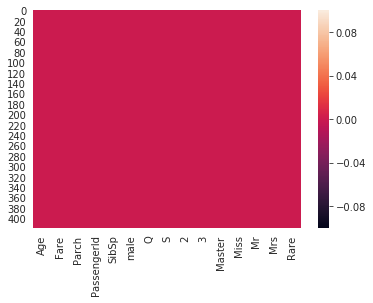

In [34]:
sns.heatmap(Test.isnull())

In [35]:
###Output through Logistic Regression
#predictionLR = logmodel.predict(Test)
#predictionLR = pd.DataFrame(predictionLR)
#predictionLR.columns = ['Survived']
#TestF = pd.concat([Test, predictionLR], axis=1)
#TestF['Survived'] = TestF['Survived'].astype(int)
#TestF = TestF.loc[:,['PassengerId', 'Survived']]
#TestF.head()
#TestF.to_csv('Prediction', index=False)

In [36]:
#Predicting model using Gender only
X_train_gender = pd.DataFrame(X_train['male'], columns = ['male'])
X_test_gender = pd.DataFrame(X_test['male'], columns = ['male'])
#logistic regression
logmodel_gender = LogisticRegression(solver='liblinear')
logmodel_gender.fit(X_train_gender, y_train)
prediction_gender = logmodel_gender.predict(X_test_gender)
print(classification_report(y_test, prediction_gender))
roc_auc_score(y_test, prediction_gender)

Test_gender = pd.DataFrame(Test[['male']], columns = ['male'])
prediction_gender = logmodel_gender.predict(Test_gender)
prediction_gender = pd.DataFrame(prediction_gender)
Test_gender = pd.concat([prediction_gender, Test['PassengerId']], axis=1)
Test_gender.columns = ['Survived', 'PassengerId']
Test_gender = Test_gender[['PassengerId','Survived']]
Test_gender.to_csv('Prediction_gender', index=False)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.64      0.70       114

   micro avg       0.76      0.76      0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268

